<a href="https://colab.research.google.com/github/Pawanme9034/k_means_clustering/blob/main/Assignment_K_Means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <u><b> Objective </b></u>
## <b> In this assignment, you need to run K-Means algorithm on a credit card dataset. </b>

<br>

## <b>Things to do :</b>
* ### Read the credit_card_dataset.csv data, clean the data and normalise the features.
* ### Write a function which fits K-Means on the data for various values of K and plot the silhoutte score for all the different values of K.
* ### Use the yellowbrick code to explore the elbow method to decide the optimal number of clusters. The code is already available in your notebook. Use the code <code> !pip install yellowbrick </code> to install this library in your kernel.
* ### Compare different metrics for evaluation of the clustering such as $distortion$, $silhouette$ etc. and find out which performs the best clustering.




## Your code below

In [1]:
import numpy as np
import pandas as pd

In [2]:
dataset ="https://raw.githubusercontent.com/Pawanme9034/k_means_clustering/main/credit_card_data.csv"
df= pd.read_csv(dataset)

In [3]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
# droping cust_id because we dont need customer id
df.drop('CUST_ID',axis=1,inplace= True )

In [5]:
df.sample()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
460,636.669685,1.0,2022.38,1892.38,130.0,0.0,0.916667,0.916667,0.333333,0.0,0,19,6000.0,939.306791,301.000749,0.0,12


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

In [7]:
#droping null values from dataset
df=df.dropna()

In [8]:
# powertransformer for make data more gussion
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson', standardize=True, copy=True)
pow_df= pd.DataFrame(pt.fit_transform(df))
pow_df.columns = df.columns

In [9]:
pow_df.skew()

BALANCE                            -0.109640
BALANCE_FREQUENCY                  -1.152496
PURCHASES                          -0.181849
ONEOFF_PURCHASES                    0.103506
INSTALLMENTS_PURCHASES             -0.024959
CASH_ADVANCE                        0.177018
PURCHASES_FREQUENCY                -0.058746
ONEOFF_PURCHASES_FREQUENCY          0.530059
PURCHASES_INSTALLMENTS_FREQUENCY    0.203550
CASH_ADVANCE_FREQUENCY              0.496963
CASH_ADVANCE_TRX                    0.382353
PURCHASES_TRX                       0.001785
CREDIT_LIMIT                       -0.010419
PAYMENTS                            0.001828
MINIMUM_PAYMENTS                   -0.025808
PRC_FULL_PAYMENT                    0.925236
TENURE                             -2.003316
dtype: float64

In [10]:
from sklearn.cluster import KMeans

In [11]:
wcss= []

for i in range(1,11):
  km=KMeans(n_clusters=i, n_init = 5,max_iter=100)
  km.fit_predict(pow_df)
  wcss.append(km.inertia_)

In [12]:
wcss

[146811.99999999988,
 106268.66984132503,
 88163.90366516294,
 78229.99931543387,
 70198.94788122186,
 66229.58504287724,
 62305.0455317875,
 59638.56124306713,
 56944.60566164385,
 54156.64000710736]

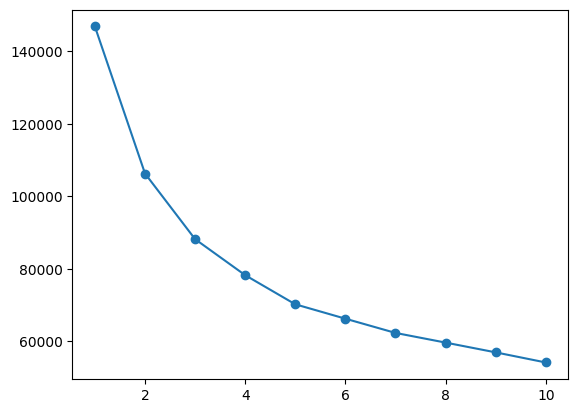

In [13]:
import matplotlib.pyplot as plt
plt.plot(range(1,11),wcss, marker = "o" )

In [14]:
X= pow_df.copy()

In [15]:
km = KMeans(n_clusters=5)
y_mean = km.fit_predict(X)
# Centroid values
centroids = km.cluster_centers_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [16]:
print(centroids) # From sci-kit learn

[[ 8.02514383e-01  4.05385751e-01  6.19976064e-01  5.61258475e-01
   4.77852525e-01  1.06571474e+00  5.54272936e-01  5.47371232e-01
   4.27051218e-01  1.03866332e+00  1.07160322e+00  6.43909835e-01
   3.38235130e-01  5.33256605e-01  7.29611967e-01 -3.74858979e-01
   1.07867360e-02]
 [ 4.58338335e-01  6.36426146e-02 -1.28999916e+00 -7.82159912e-01
  -1.03870720e+00  9.99242783e-01 -1.21260750e+00 -7.65143634e-01
  -9.84327156e-01  9.43840419e-01  9.58582685e-01 -1.26011848e+00
  -1.24670369e-01 -4.24184754e-02  2.78390867e-01 -3.98729449e-01
  -1.68781850e-01]
 [-4.90571663e-01 -4.92518100e-01  1.71982006e-01  7.68285584e-01
  -7.96614455e-01 -7.78776341e-01 -3.85361792e-01  5.93514387e-01
  -8.57918020e-01 -7.61223399e-01 -7.74455039e-01 -1.87342878e-01
  -1.57755878e-01 -4.17000515e-01 -4.57676150e-01 -1.91853506e-01
  -4.56734287e-04]
 [ 9.67996037e-02  3.99095792e-01  1.10986918e+00  1.07755243e+00
   9.24451129e-01 -8.76992497e-01  9.87252147e-01  1.16256135e+00
   8.36640042e-01 -

In [17]:
X_df = X
X_df["group"] = y_mean

array([[<Axes: title={'center': 'BALANCE'}, xlabel='[group]'>,
        <Axes: title={'center': 'BALANCE_FREQUENCY'}, xlabel='[group]'>,
        <Axes: title={'center': 'CASH_ADVANCE'}, xlabel='[group]'>,
        <Axes: title={'center': 'CASH_ADVANCE_FREQUENCY'}, xlabel='[group]'>,
        <Axes: title={'center': 'CASH_ADVANCE_TRX'}, xlabel='[group]'>,
        <Axes: title={'center': 'CREDIT_LIMIT'}, xlabel='[group]'>],
       [<Axes: title={'center': 'INSTALLMENTS_PURCHASES'}, xlabel='[group]'>,
        <Axes: title={'center': 'MINIMUM_PAYMENTS'}, xlabel='[group]'>,
        <Axes: title={'center': 'ONEOFF_PURCHASES'}, xlabel='[group]'>,
        <Axes: title={'center': 'ONEOFF_PURCHASES_FREQUENCY'}, xlabel='[group]'>,
        <Axes: title={'center': 'PAYMENTS'}, xlabel='[group]'>,
        <Axes: title={'center': 'PRC_FULL_PAYMENT'}, xlabel='[group]'>],
       [<Axes: title={'center': 'PURCHASES'}, xlabel='[group]'>,
        <Axes: title={'center': 'PURCHASES_FREQUENCY'}, xlabel='[group]

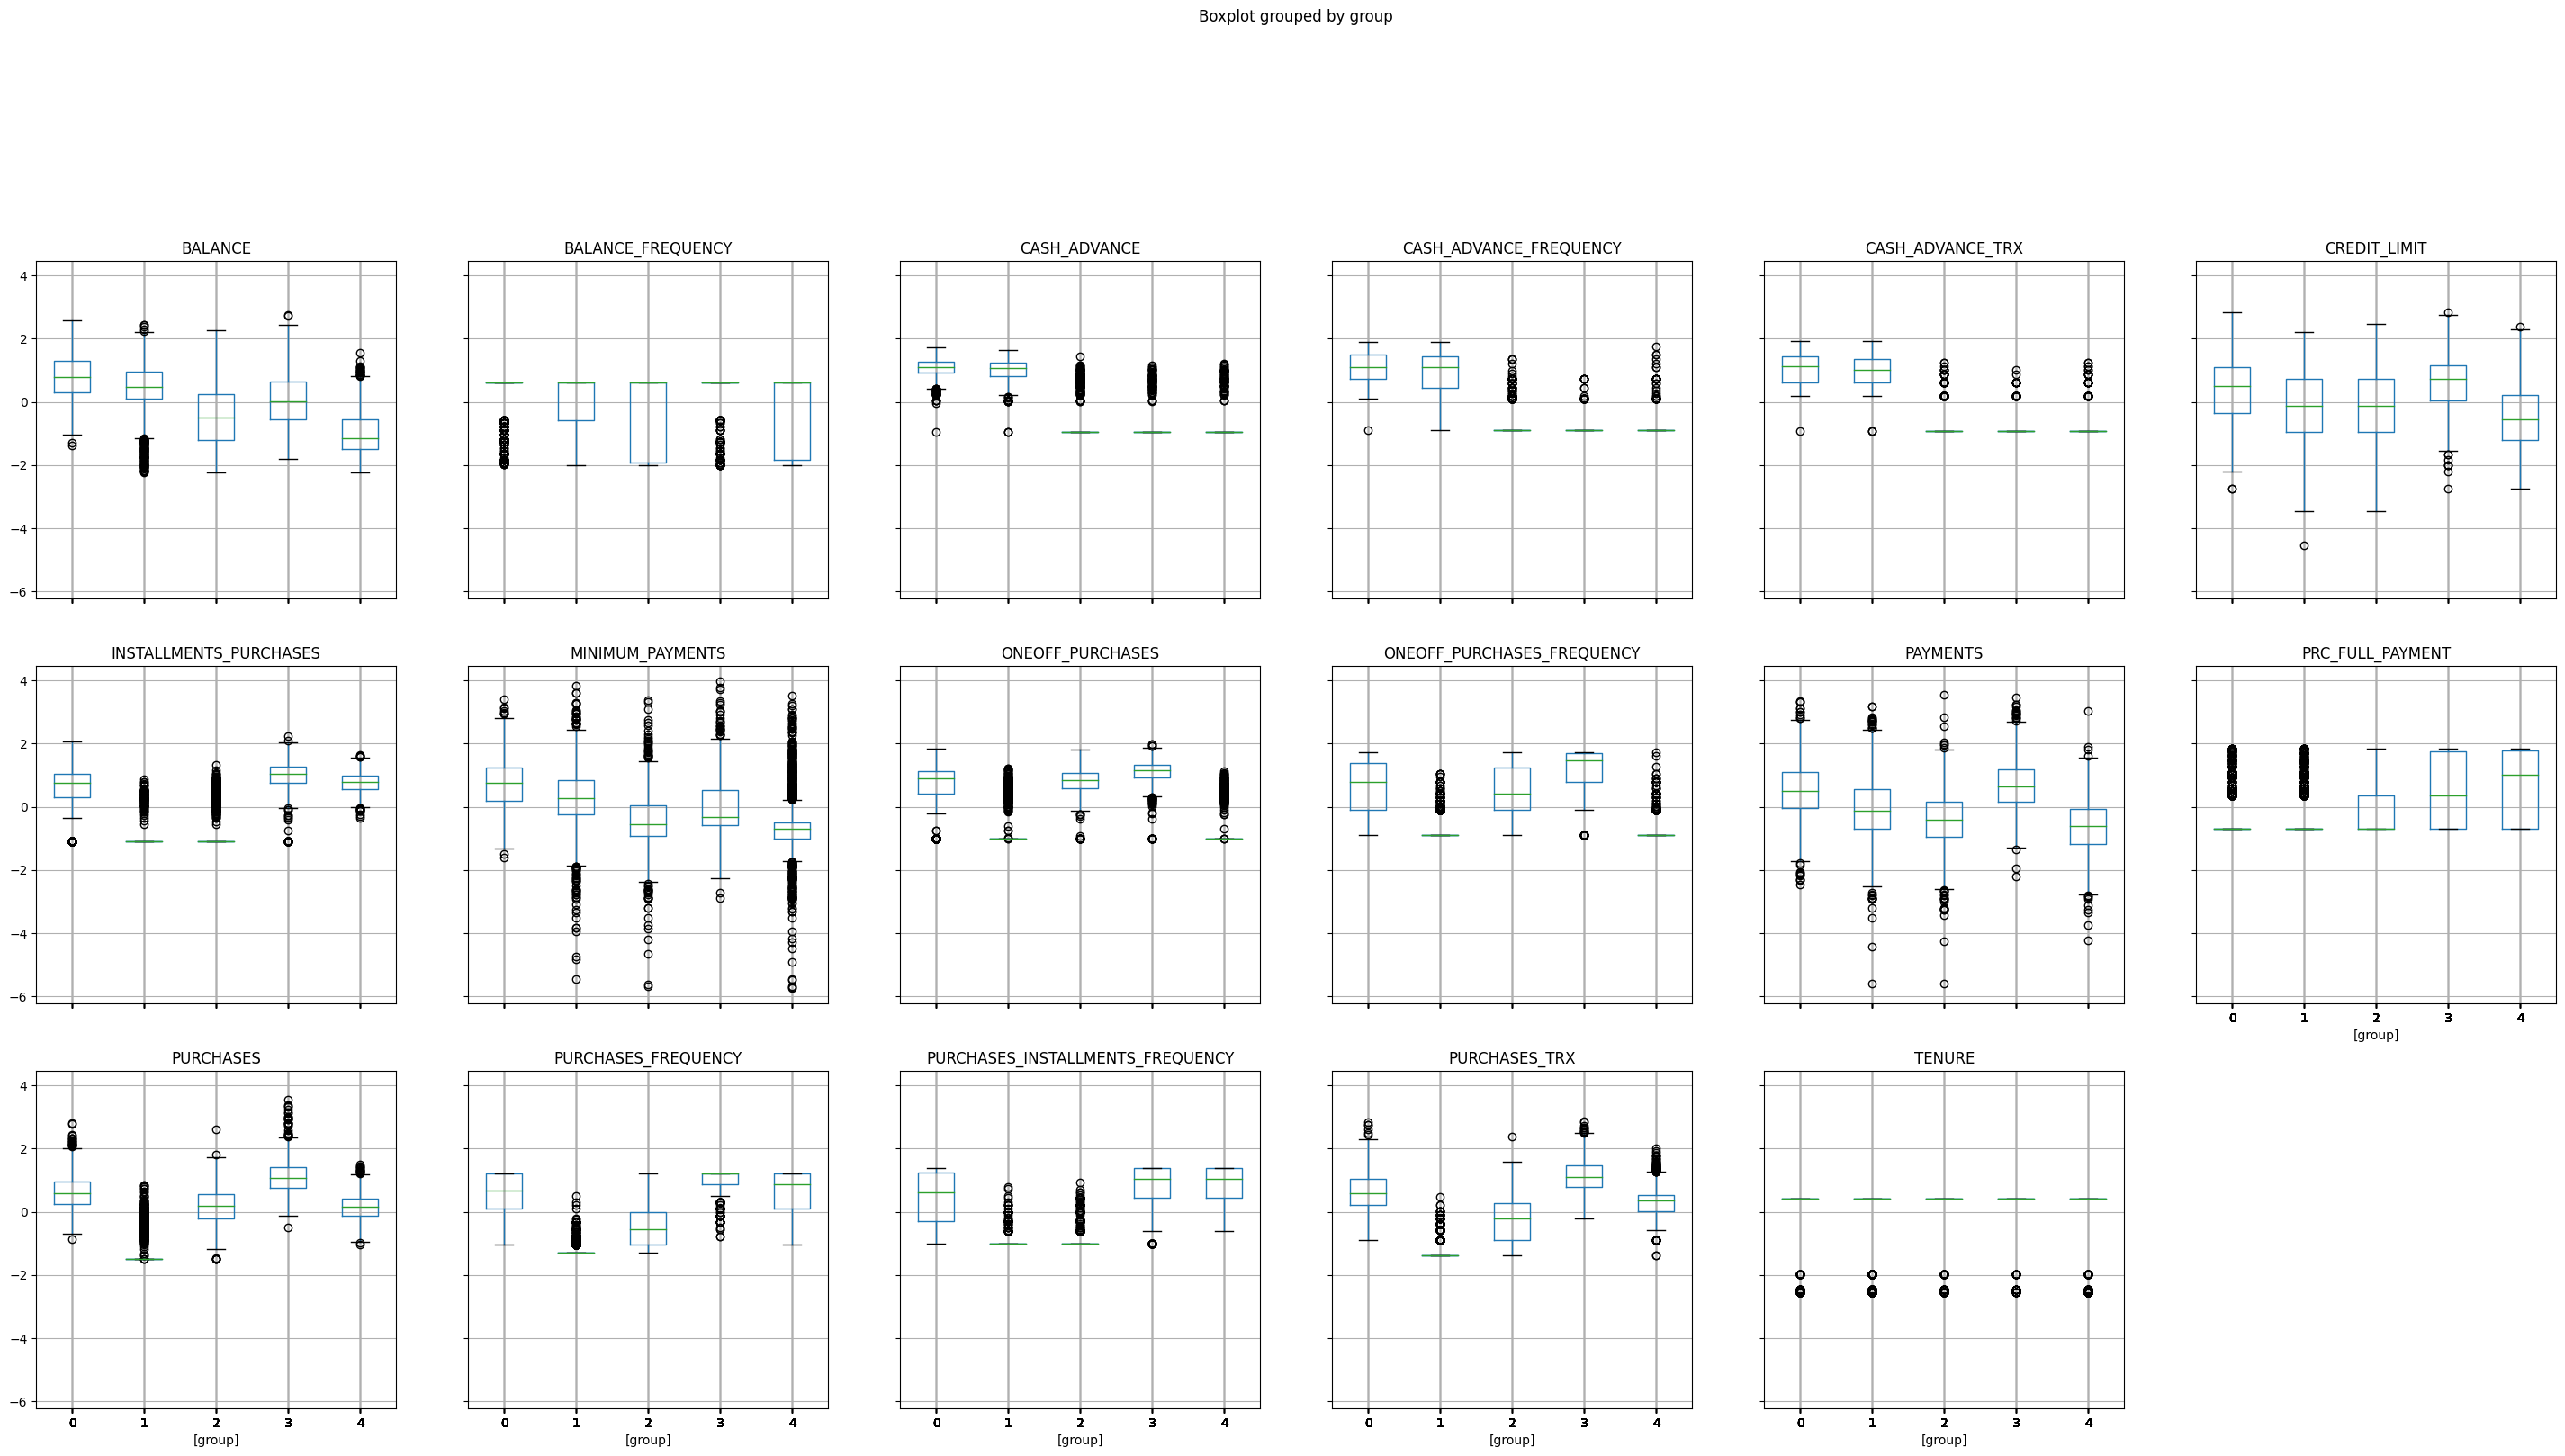

In [20]:
X_df.boxplot(by = 'group',  layout=(6,6), figsize=(35, 35))

Automatically created module for IPython interactive environment


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 2 The average silhouette_score is : 0.2632806148732257


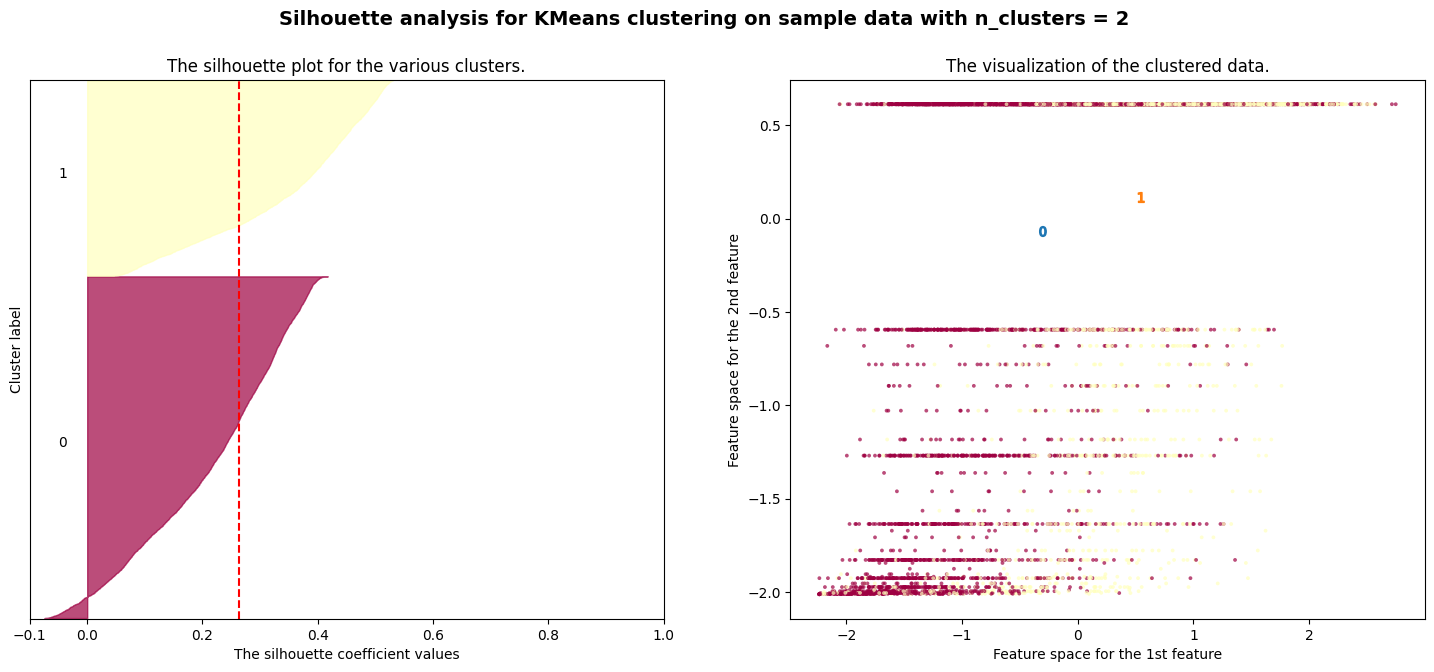

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 3 The average silhouette_score is : 0.23886307648534919


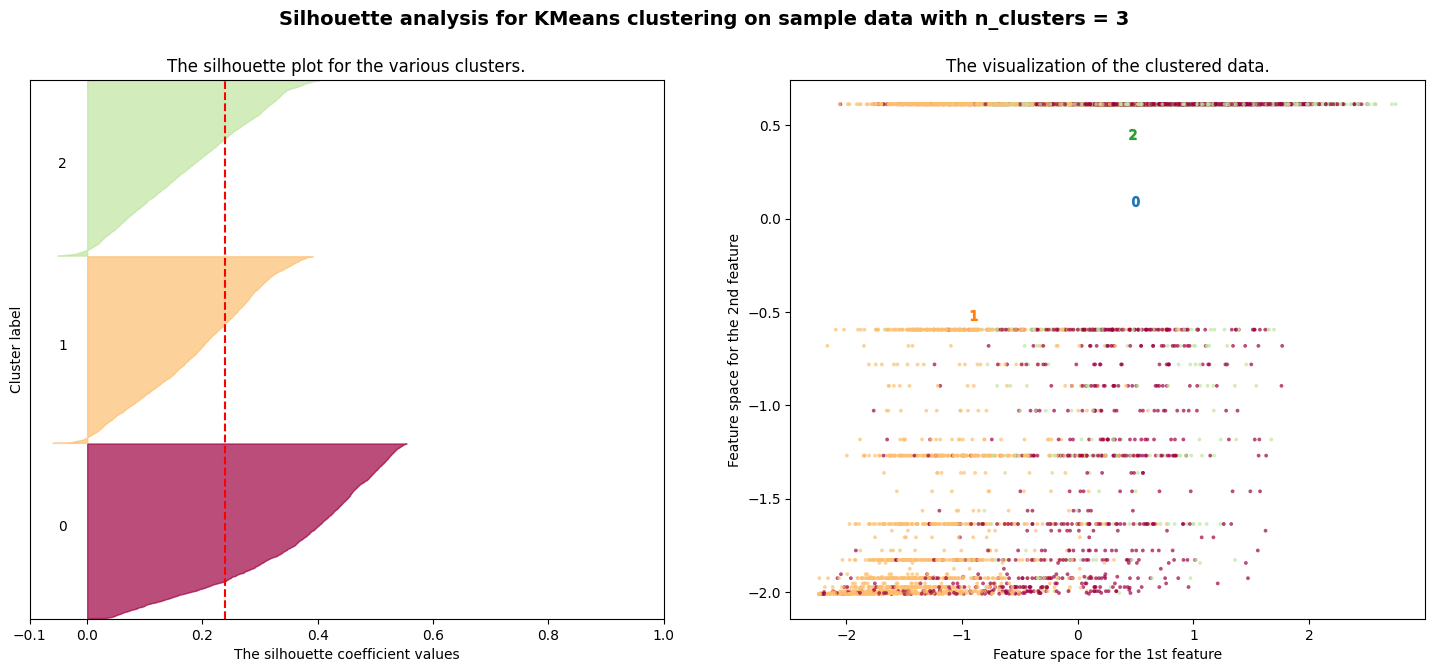

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 4 The average silhouette_score is : 0.23221127465290142


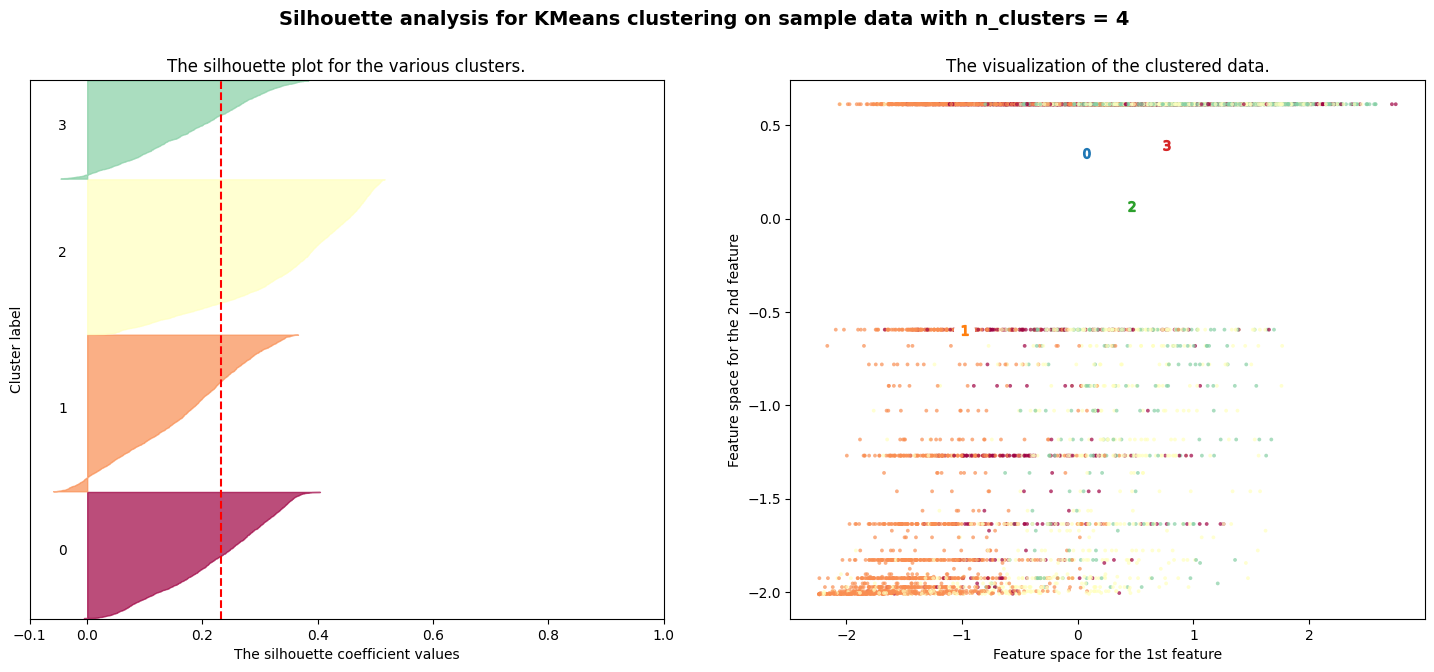

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 5 The average silhouette_score is : 0.24358267937773995


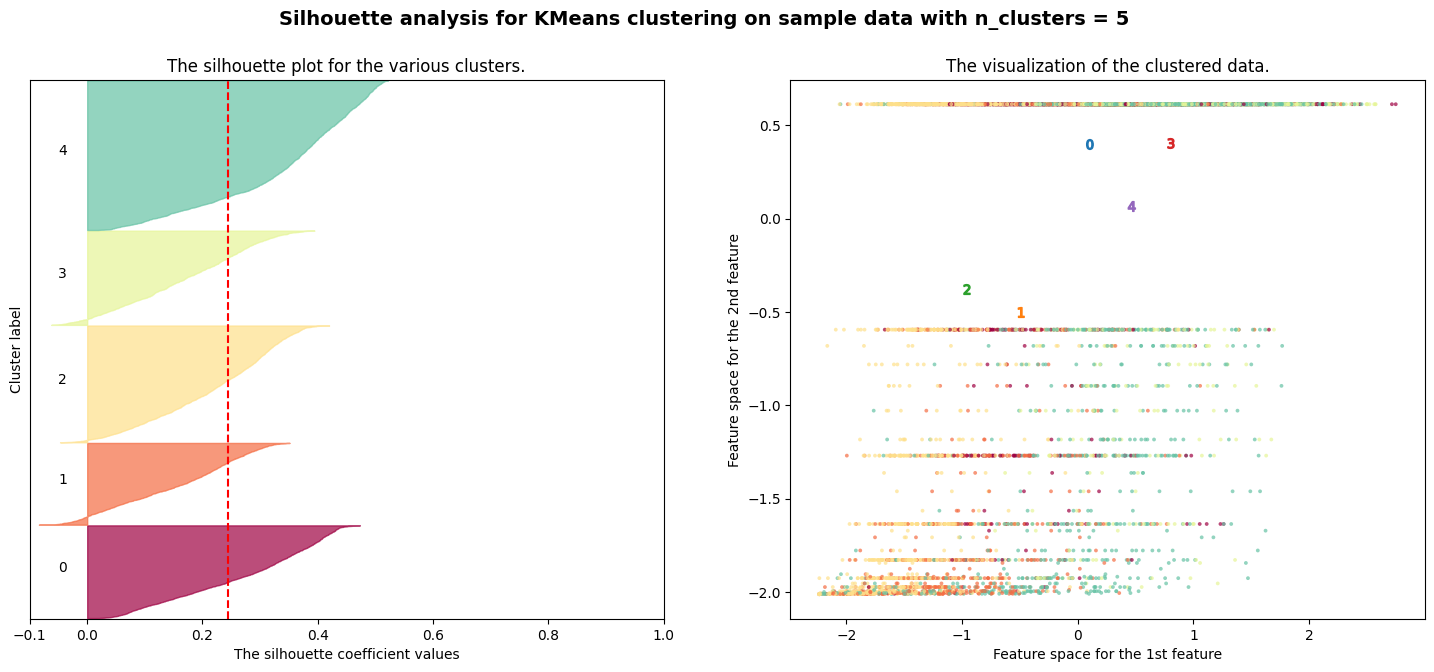

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 6 The average silhouette_score is : 0.2364914973753392


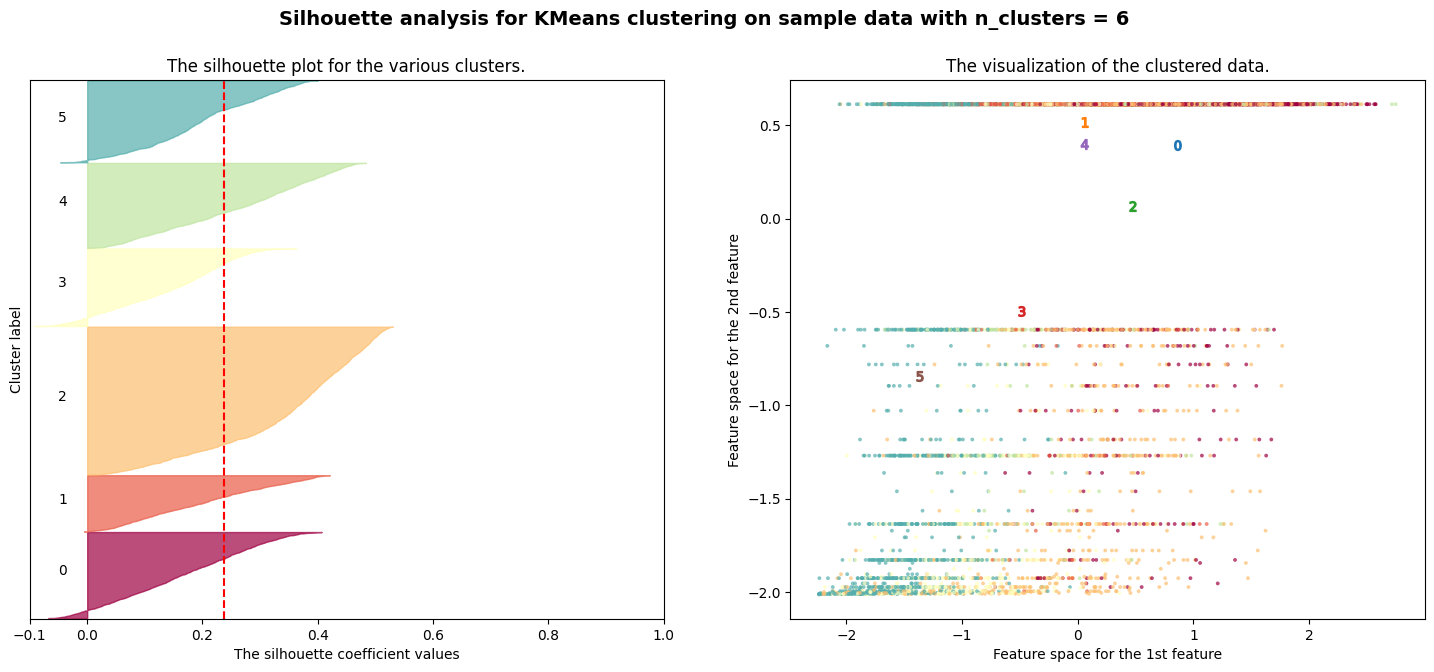

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 7 The average silhouette_score is : 0.19136527796747127


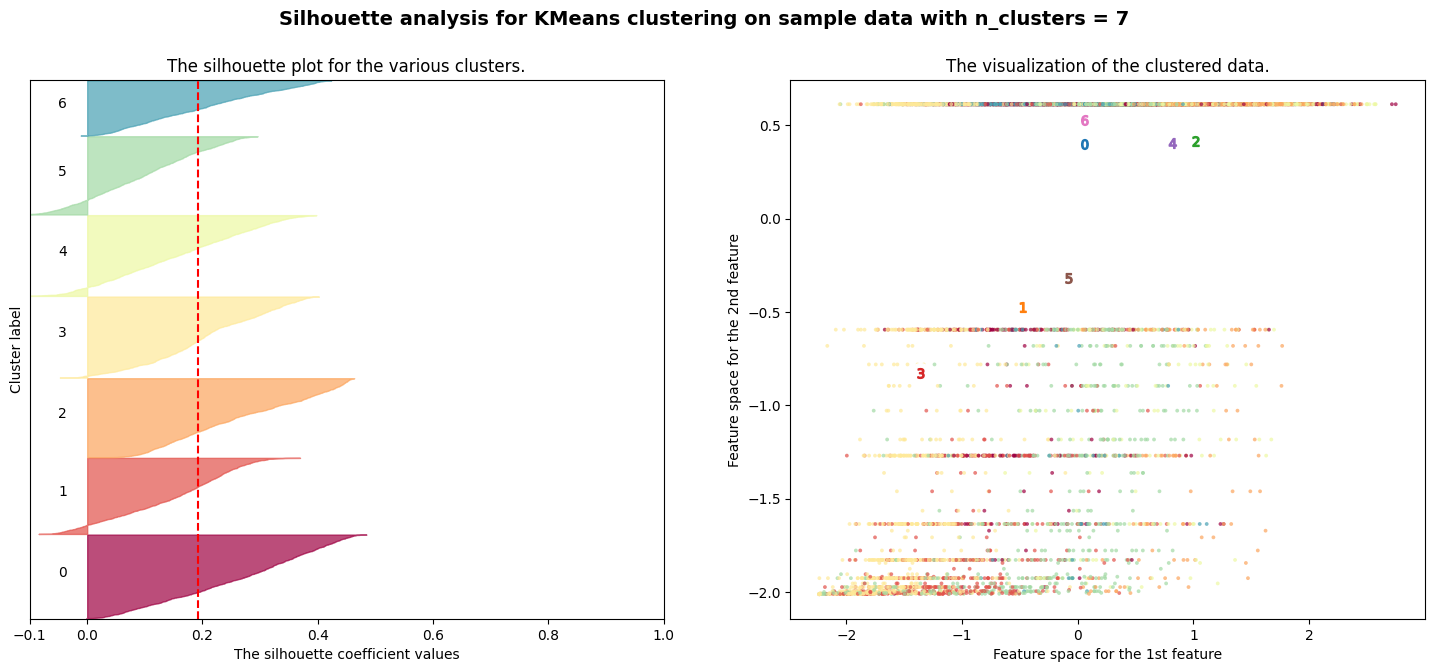

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 8 The average silhouette_score is : 0.21193602274739423


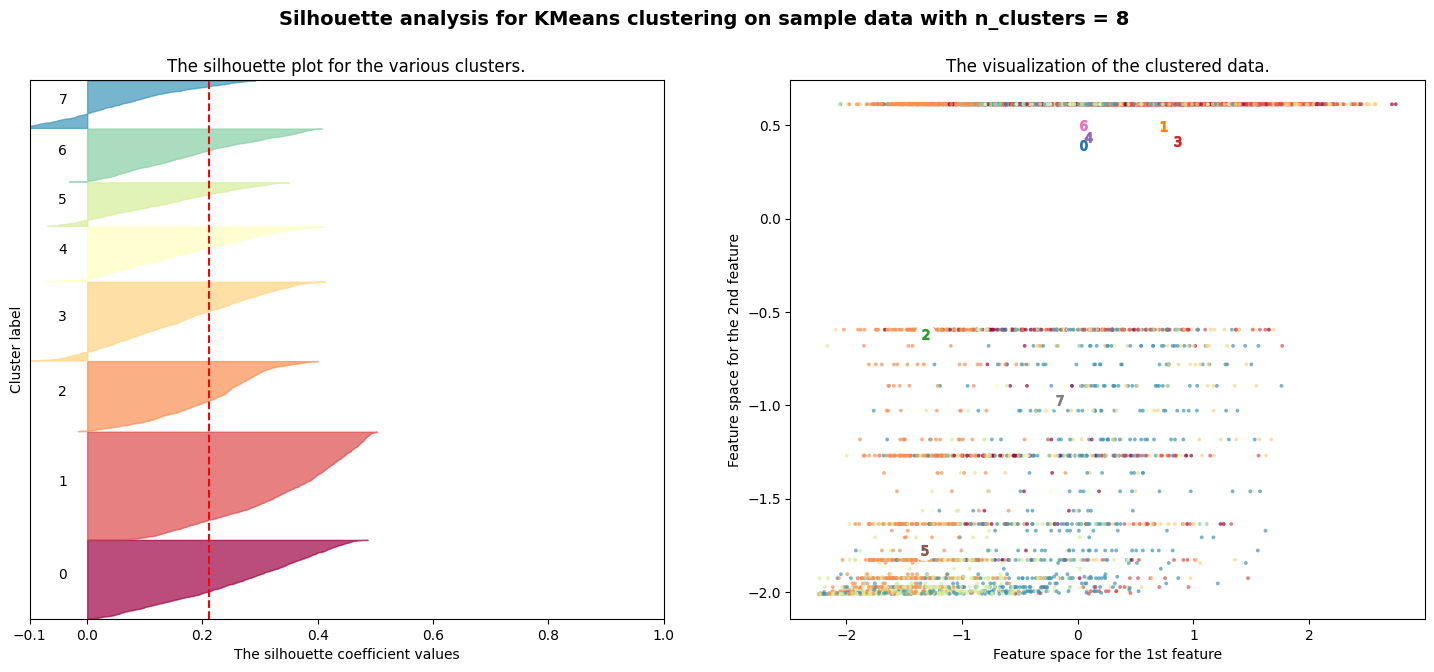

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 9 The average silhouette_score is : 0.21710210670296742


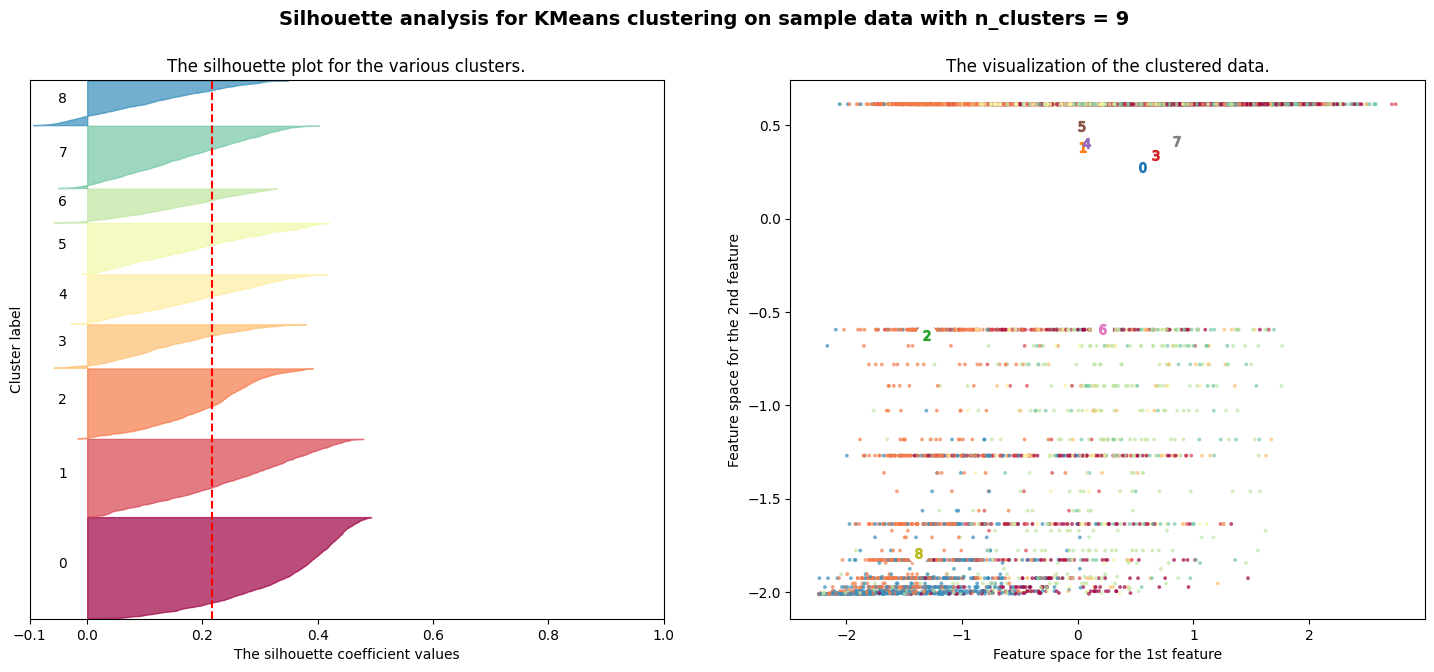

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 10 The average silhouette_score is : 0.20418907696877459


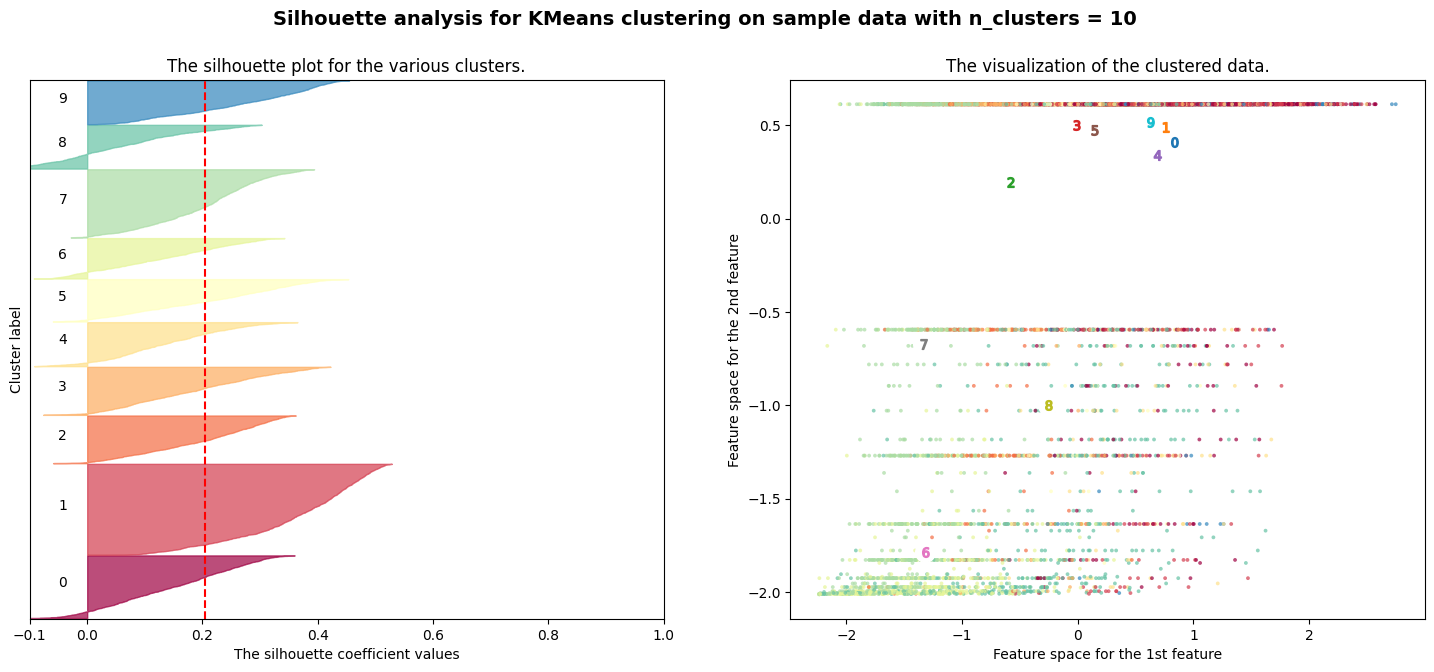

In [21]:
from __future__ import print_function
%matplotlib inline

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X=X_df.drop('group',axis=1).values
y=X_df['group'].values

range_n_clusters = [2, 3, 4, 5, 6,7,8,9,10]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.Spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.Spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors)

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1],
                marker='o', c="white", alpha=1, s=200)

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

In [23]:
from sklearn.cluster import AgglomerativeClustering
model2 = AgglomerativeClustering(n_clusters=5, affinity='euclidean',  linkage='ward')
model2.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


AgglomerativeClustering(affinity='euclidean', n_clusters=5)

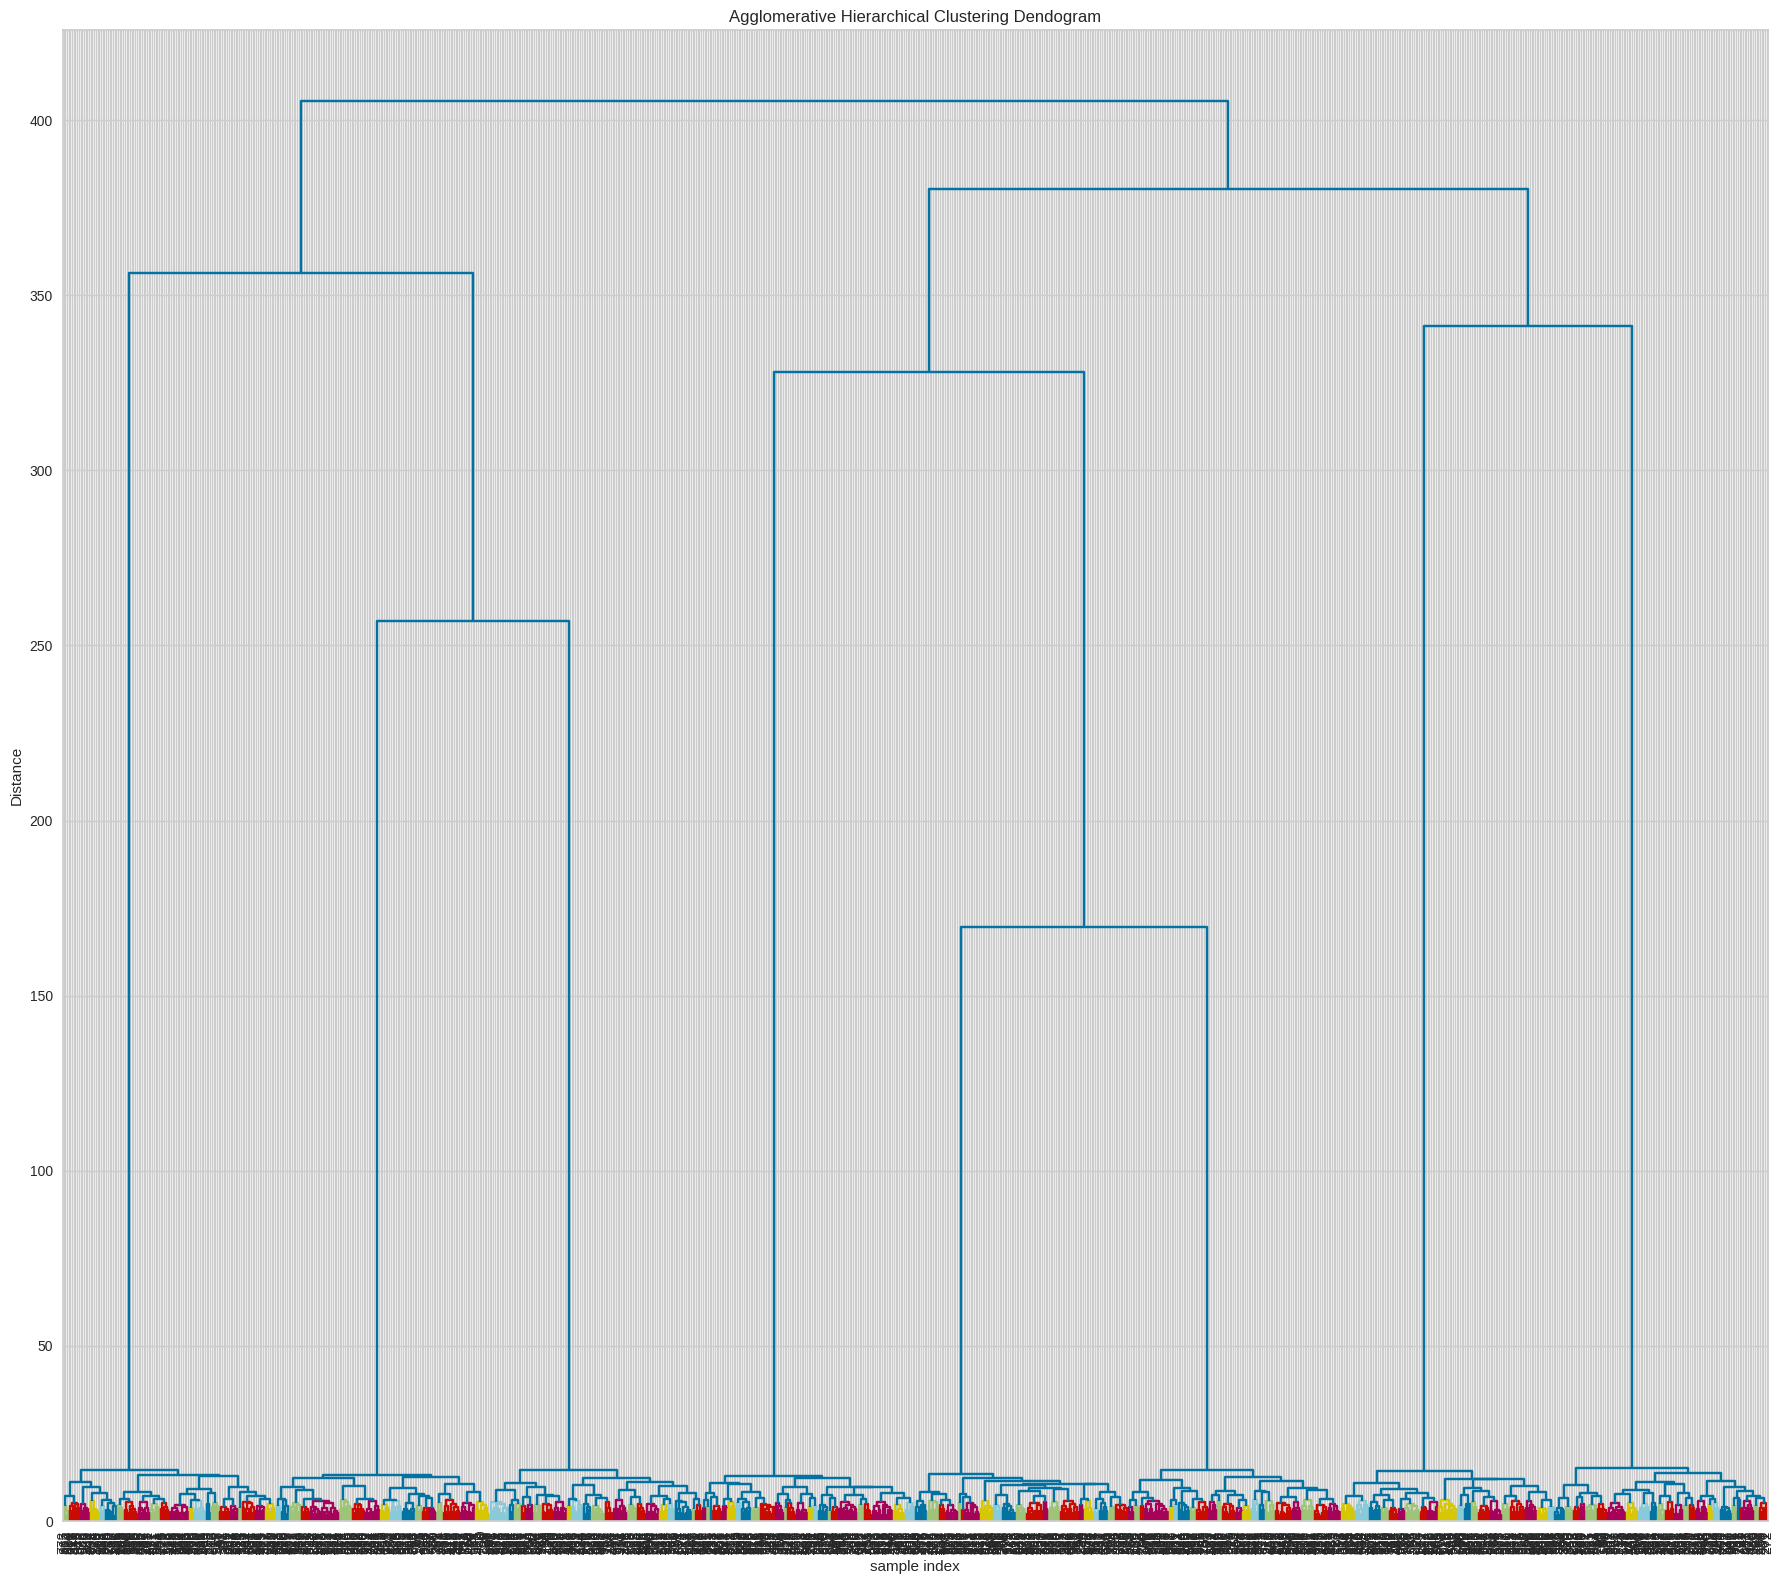

In [24]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
plt.figure(figsize=(18, 16))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
Z = linkage(X, 'ward')
dendrogram(Z,leaf_rotation=90.0,p=25,color_threshold=6,leaf_font_size=10,truncate_mode='level')
plt.tight_layout()

## <u>Use the KElbowVisualizer to find the optimal number of clusters $K_{optimal}$. </u>

### The elbow method is a heuristic used in determining the number of clusters in a data set. The method consists of plotting the explained variation as a function of the number of clusters, and picking the elbow of the curve as the number of clusters to use.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

KElbowVisualizer(ax=<Axes: >, estimator=KMeans(n_clusters=11), k=(4, 12),
                 locate_elbow=False, timings=False)

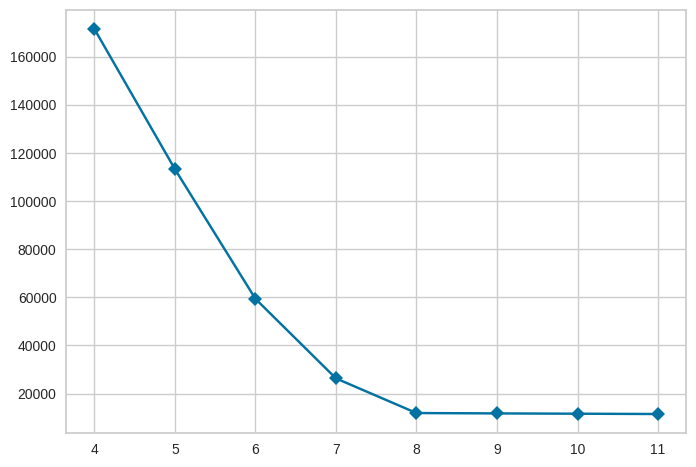

In [22]:
# Sample code to run the KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from yellowbrick.cluster import KElbowVisualizer

# Generate synthetic dataset with 8 random clusters
X, y = make_blobs(n_samples=1000, n_features=12, centers=8, random_state=42)

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(
    model, k=(4,12), metric='distortion', timings=False, locate_elbow=False
)

visualizer.fit(X)        # Fit the data to the visualizer